# Restrictions during the COVID-19 Pandemic

Explore the impact of COVID-19 restrictions on Mental Health related searches by forecasting searches with COVID-19 Restrictions as Exogenous features and without Exogenous features and comparing MSE.

In [1]:
import matplotlib.pyplot as plt
import functions
import numpy as np
np.random.seed(42)

from sklearn.linear_model import Ridge

import warnings
warnings.simplefilter('ignore')

---

In [2]:
# We are looking at the middle of the pandemic
period = '2020-09-30'

# Number of weeks to predict
steps = 7

# Recursive multi-step forecasting with exogenous variables

## Forecasting Searches for Most Restricted States 

### with Exoginous Variables 


 Forecast for most_restricted and depression untill 2020-09-30 

Test error (mse): 22.05 



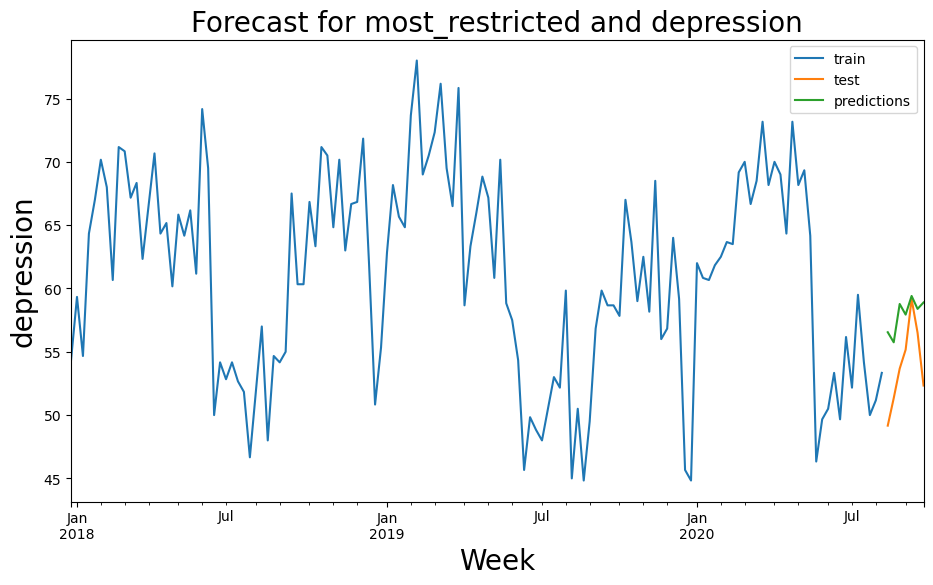


 Forecast for most_restricted and anxiety untill 2020-09-30 

Test error (mse): 63.52 



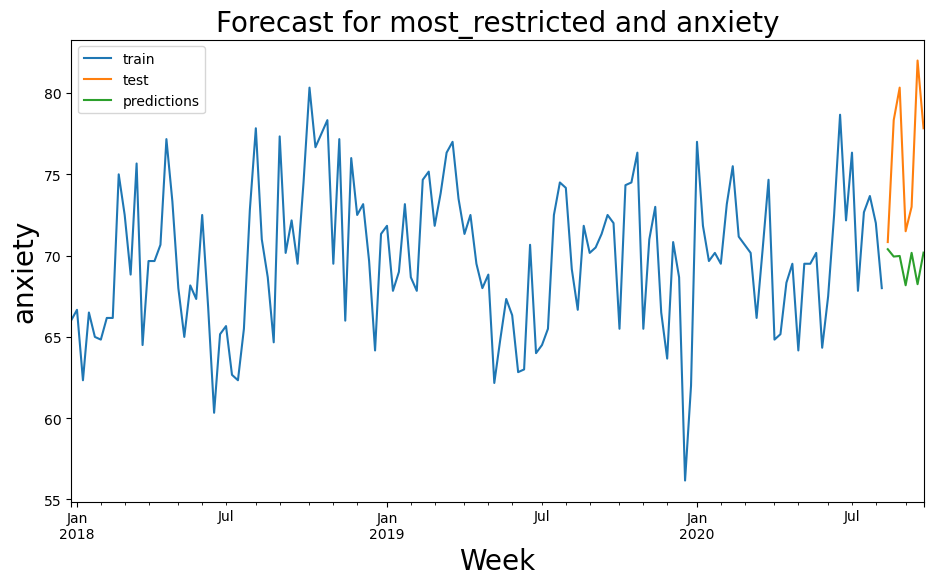


 Forecast for most_restricted and addiction untill 2020-09-30 

Test error (mse): 2.8 



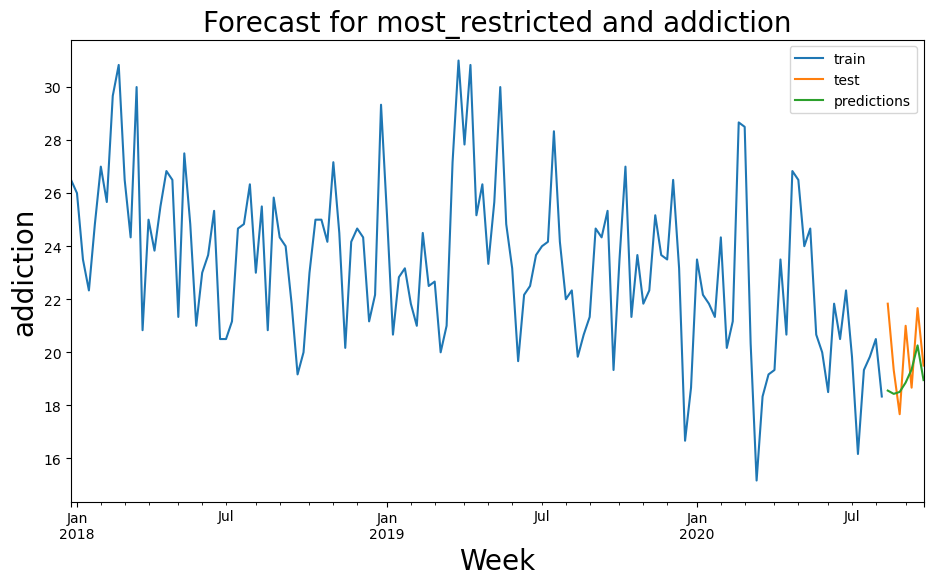


 Forecast for most_restricted and counselling untill 2020-09-30 

Test error (mse): 6.88 



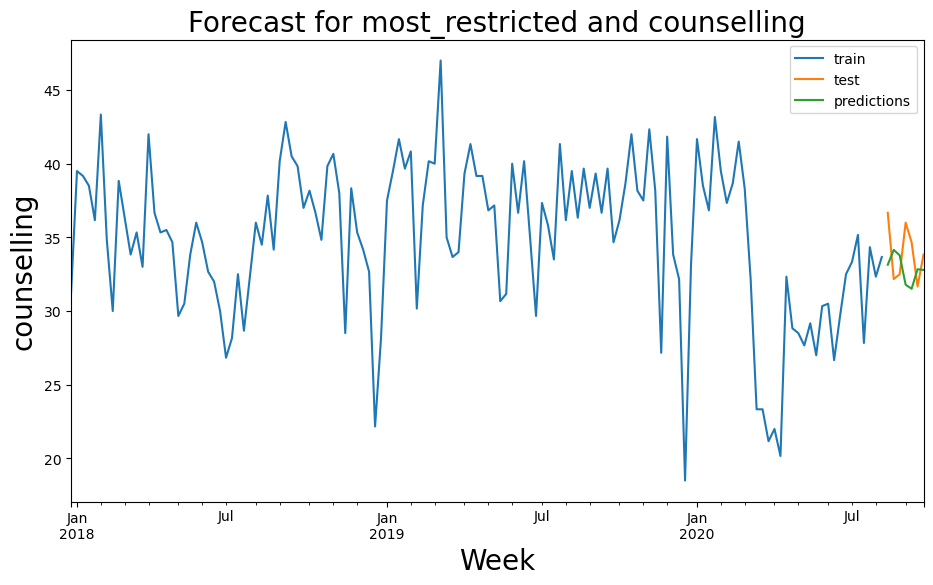


 Forecast for most_restricted and mental_health untill 2020-09-30 

Test error (mse): 15.04 



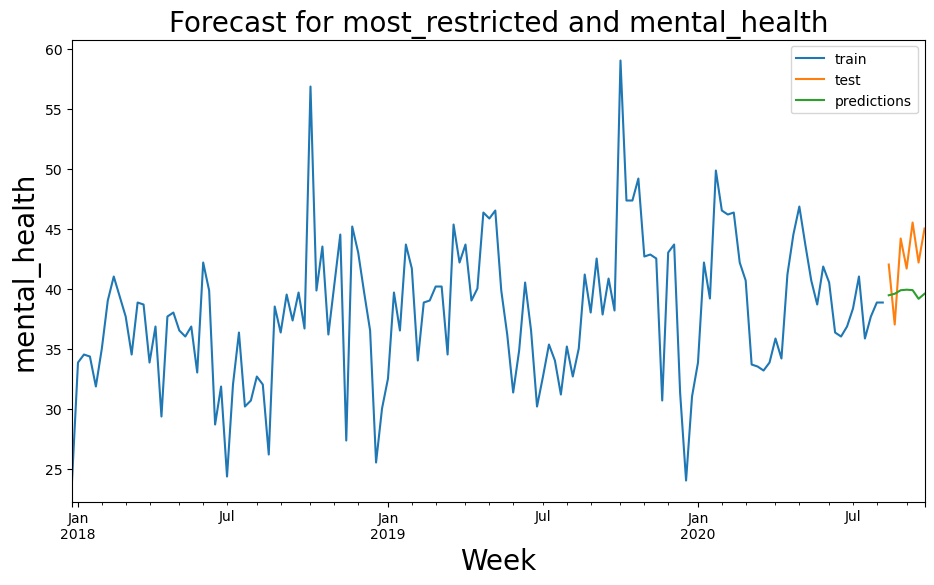

In [3]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
fa_mse_dic_most = {}
for search in searches_list:
        mse = functions.forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_most[f'{search}_ex'] = mse

Mean Standard Error (MSE) for all models is significantly lower than 100, which is a relatively good result. We tried hyperparameter tuning but it did not improve the MSE. 

### without Exoginous Variables 

In [4]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_most[search] = mse


 Forecast for most_restricted and depression untill 2020-09-30 

Test error (mse): 44.74 


 Forecast for most_restricted and anxiety untill 2020-09-30 

Test error (mse): 69.47 


 Forecast for most_restricted and addiction untill 2020-09-30 

Test error (mse): 3.68 


 Forecast for most_restricted and counselling untill 2020-09-30 

Test error (mse): 6.09 


 Forecast for most_restricted and mental_health untill 2020-09-30 

Test error (mse): 21.31 



In [5]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_most = functions.dict_diff(fa_mse_dic_most)
print(rf_diff_most)

{'depression': -22.69, 'anxiety': -5.95, 'addiction': -0.88, 'counselling': 0.79, 'mental_health': -6.27}


The models for the most restricted states were improved when it came to forecasting 'anxiety', 'mental health' and particularly 'depression', when exogenous features were included in the modelling. The models for forecasting 'addiction' and 'counselling' performed relatively similarly regardless of if exogenous features were included in the model.

---

## Forecasting Searches for Least Restricted States 

###  with Exogenous Variables 


 Forecast for least_restricted and depression untill 2020-09-30 

Test error (mse): 20.61 



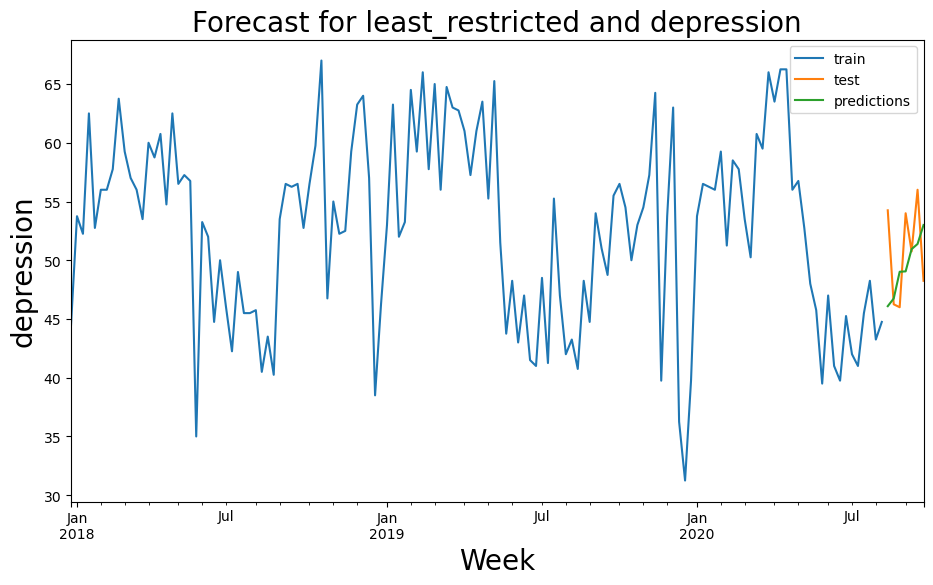


 Forecast for least_restricted and anxiety untill 2020-09-30 

Test error (mse): 19.78 



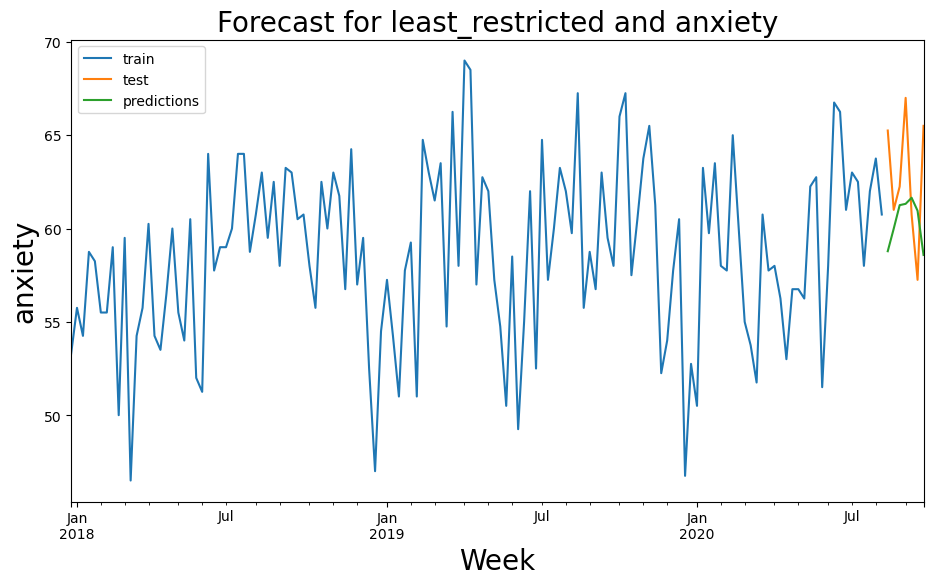


 Forecast for least_restricted and addiction untill 2020-09-30 

Test error (mse): 4.67 



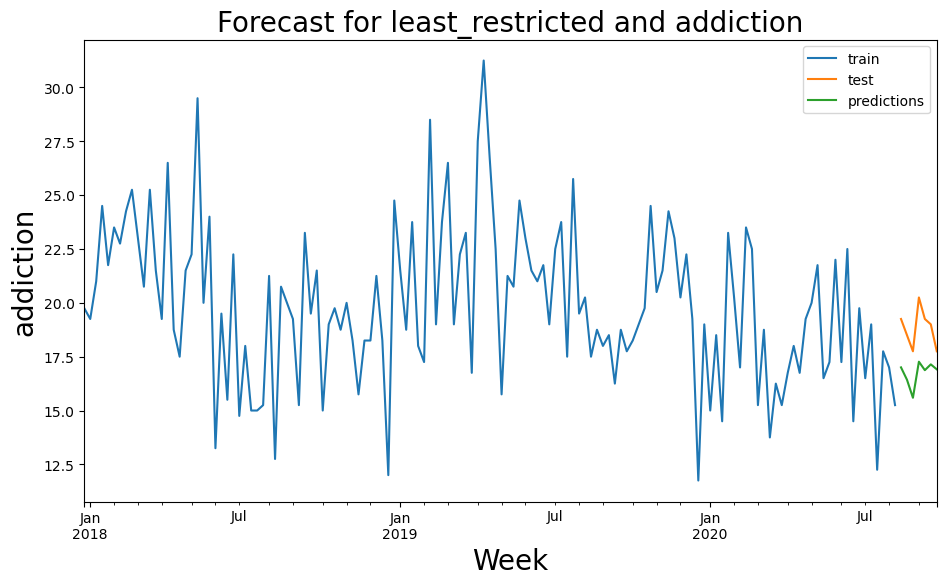


 Forecast for least_restricted and counselling untill 2020-09-30 

Test error (mse): 4.78 



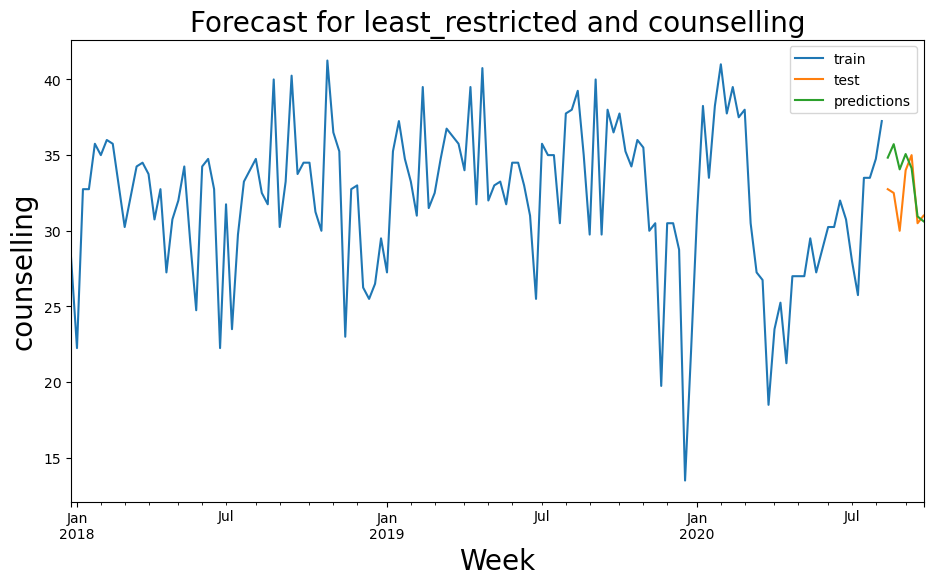


 Forecast for least_restricted and mental_health untill 2020-09-30 

Test error (mse): 58.45 



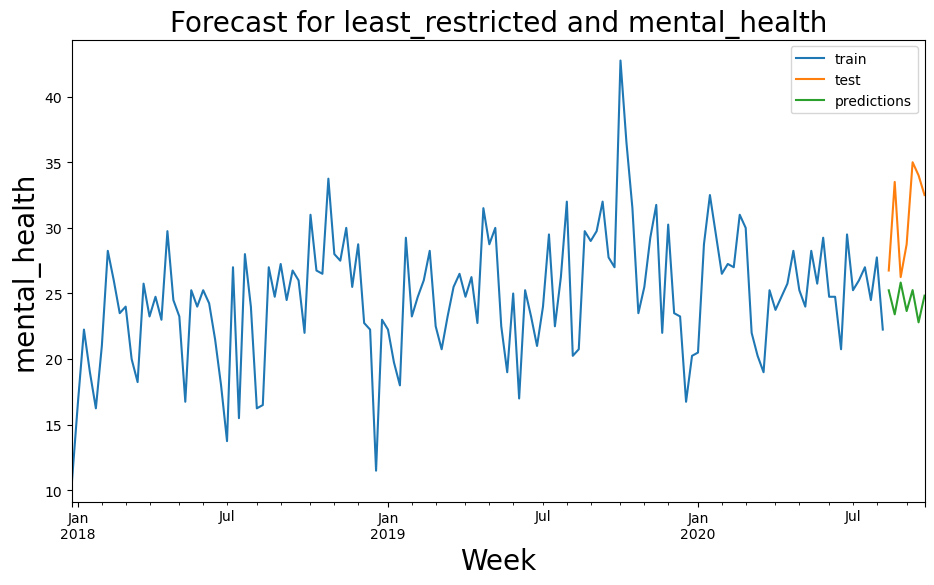

In [6]:
fa_mse_dic_least = {}
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_least[f'{search}_ex'] = mse

Mean Standard Error (MSE) for all models is significantly lower than 100, which is a relatively good result. We tried hyperparameter tuning but it did not improve the MSE.

### without Exoginous Variables 

In [7]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='least_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_least[search] = mse


 Forecast for least_restricted and depression untill 2020-09-30 

Test error (mse): 28.28 


 Forecast for least_restricted and anxiety untill 2020-09-30 

Test error (mse): 31.95 


 Forecast for least_restricted and addiction untill 2020-09-30 

Test error (mse): 0.77 


 Forecast for least_restricted and counselling untill 2020-09-30 

Test error (mse): 7.47 


 Forecast for least_restricted and mental_health untill 2020-09-30 

Test error (mse): 52.27 



In [8]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_least = functions.dict_diff(fa_mse_dic_least)
print(rf_diff_least)

{'depression': -6.97, 'anxiety': -10.64, 'addiction': 20.54, 'counselling': 13.84, 'mental_health': -30.96}


The recursive multistep forecasting models for the least restricted states were improved for 'depression', 'anxiety' and particularly 'mental health' searches by including exogenous features, whereas the models for forecasting 'addiction' and 'counselling' performed better without.

---

# SARIMAX

## Forecasting Searches for Most Restricted States 

### With Exogenous Features


 Forecast for most_restricted and depression untill 2020-09-30 

MSE
8.85


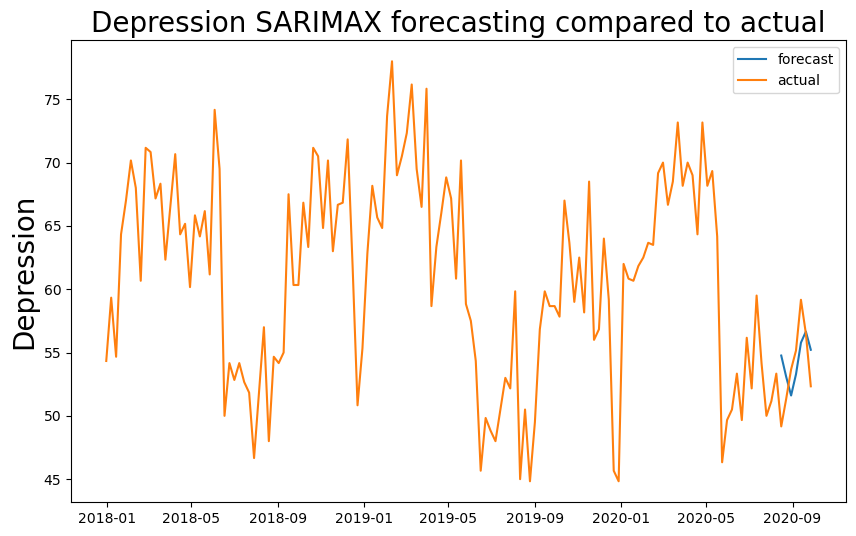


 Forecast for most_restricted and anxiety untill 2020-09-30 

MSE
49.3


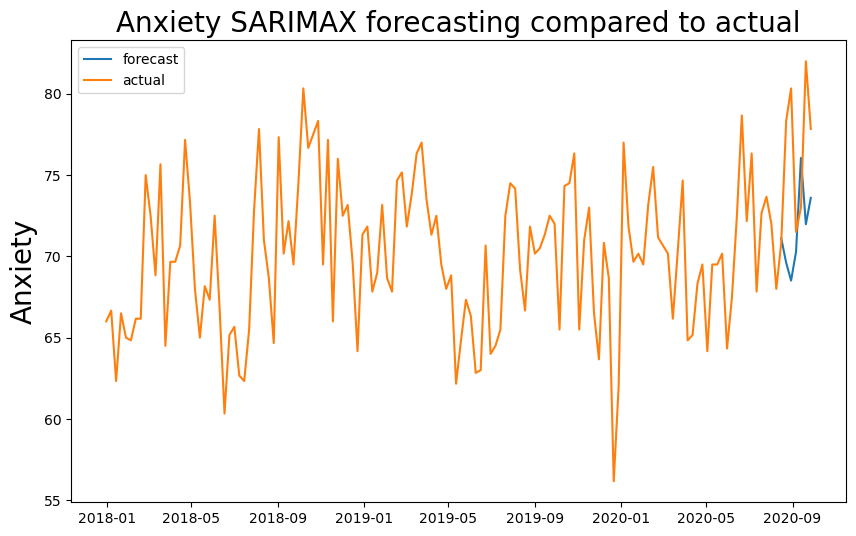


 Forecast for most_restricted and addiction untill 2020-09-30 

MSE
4.48


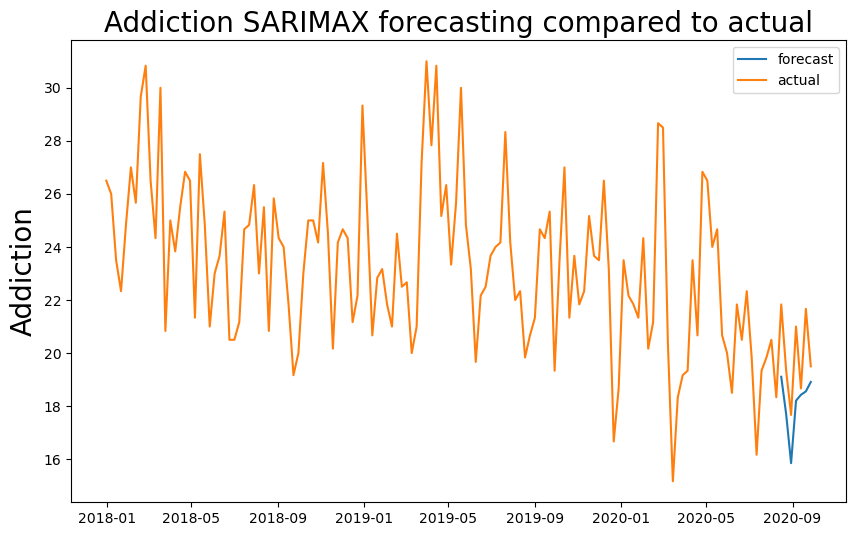


 Forecast for most_restricted and counselling untill 2020-09-30 

MSE
6.71


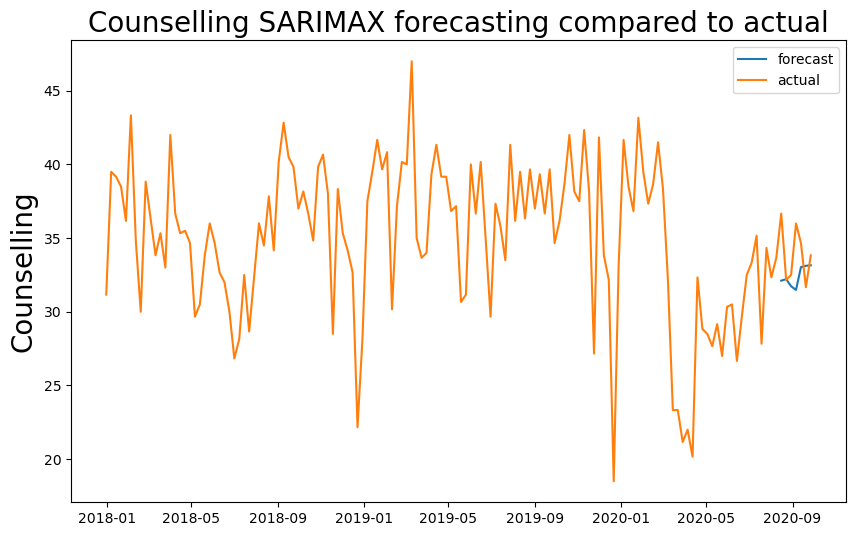


 Forecast for most_restricted and mental_health untill 2020-09-30 

MSE
35.95


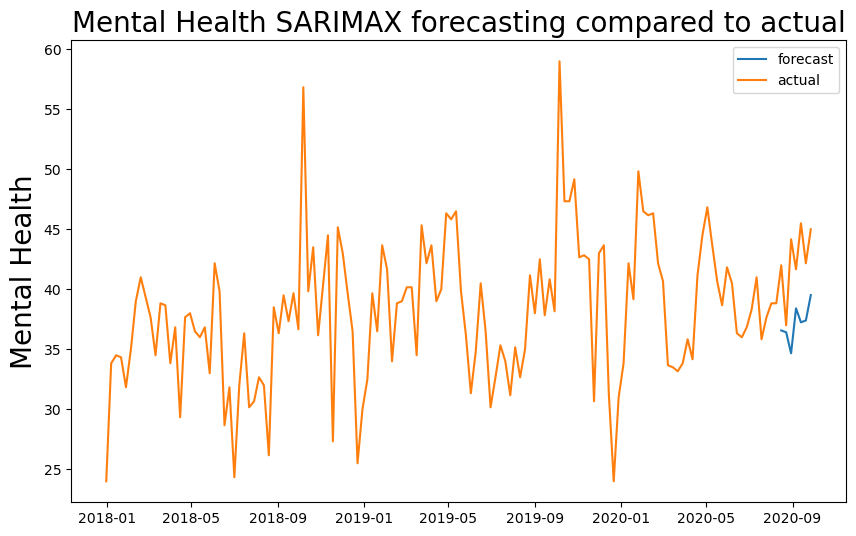

In [9]:
mse_dic_most = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=True)
    mse_dic_most[f'{search}_ex'] = mse
    plt.show()

Overall, MSE of SARIMAX models is similar to that for Recursive Multi-step Forecasting. Once again, we tried to grid search hyperparameters, but found little change in performance.

### without Exogenous Variables 

In [10]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_most[search] = mse
    plt.show()


 Forecast for most_restricted and depression untill 2020-09-30 

MSE
9.41

 Forecast for most_restricted and anxiety untill 2020-09-30 

MSE
60.9

 Forecast for most_restricted and addiction untill 2020-09-30 

MSE
1.45

 Forecast for most_restricted and counselling untill 2020-09-30 

MSE
11.03

 Forecast for most_restricted and mental_health untill 2020-09-30 

MSE
13.34


In [11]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_most = functions.dict_diff(mse_dic_most)
print(sarima_diff_most)

{'depression': -0.56, 'anxiety': -11.6, 'addiction': 3.03, 'counselling': -4.32, 'mental_health': 22.61}


The models for most restricted states were only improved by including exogenous features when forecasting 'anxiety' and 'counselling' (to a lesser extent). There was no significant difference in performance for forecasting 'depression' in models with or without exogenous features. The models without exogenous features performed better for forecasting 'mental health' and 'addiction' (to a lesser extent) searches. 

---

## Forecasting Searches for Least Restricted States 

### with Exogenous Features


 Forecast for least_restricted and depression untill 2020-05-30 

MSE
92.88


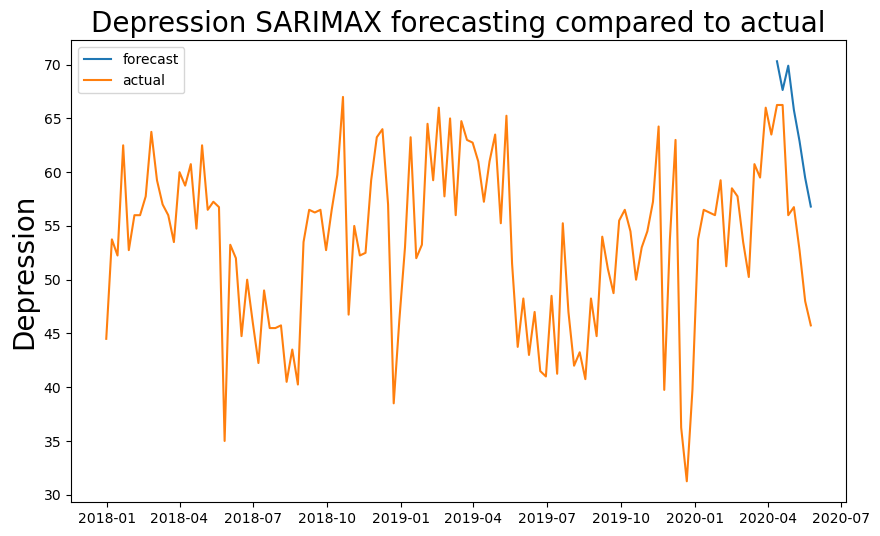


 Forecast for least_restricted and anxiety untill 2020-05-30 

MSE
14.9


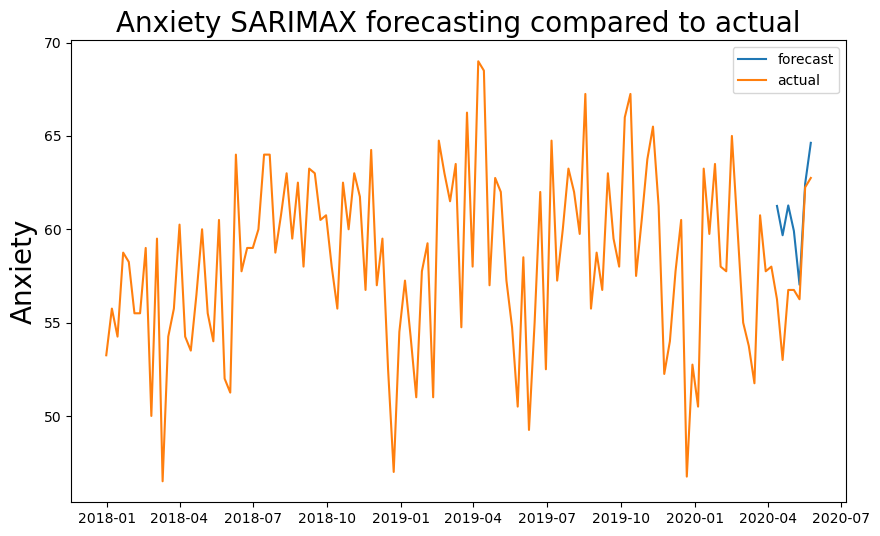


 Forecast for least_restricted and addiction untill 2020-05-30 

MSE
7.77


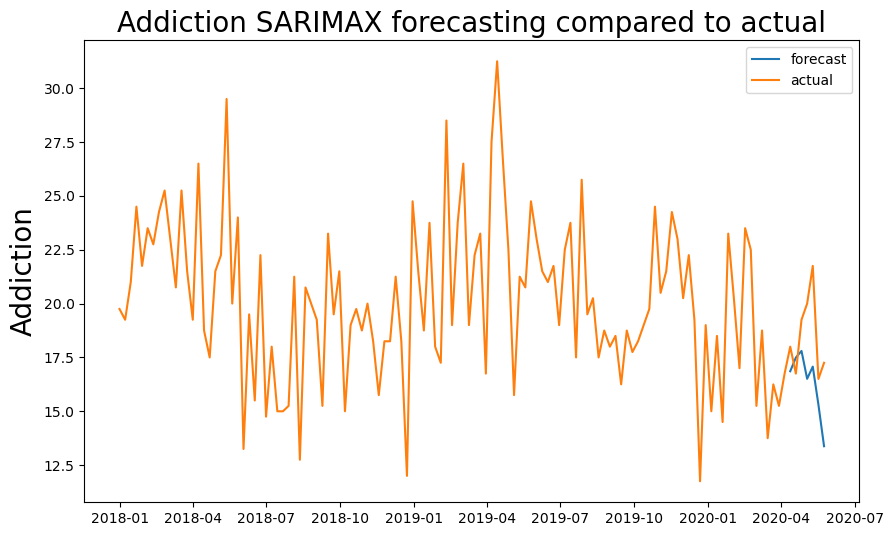


 Forecast for least_restricted and counselling untill 2020-05-30 

MSE
54.44


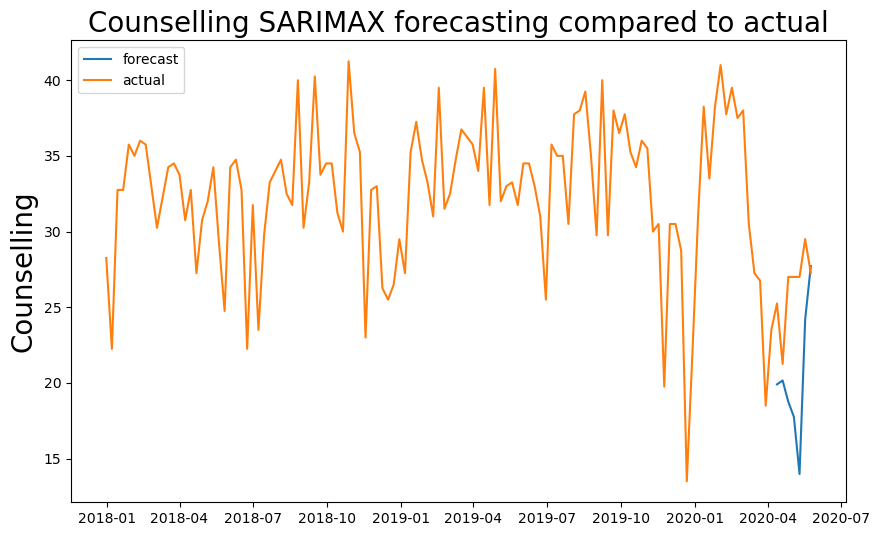


 Forecast for least_restricted and mental_health untill 2020-05-30 

MSE
64.13


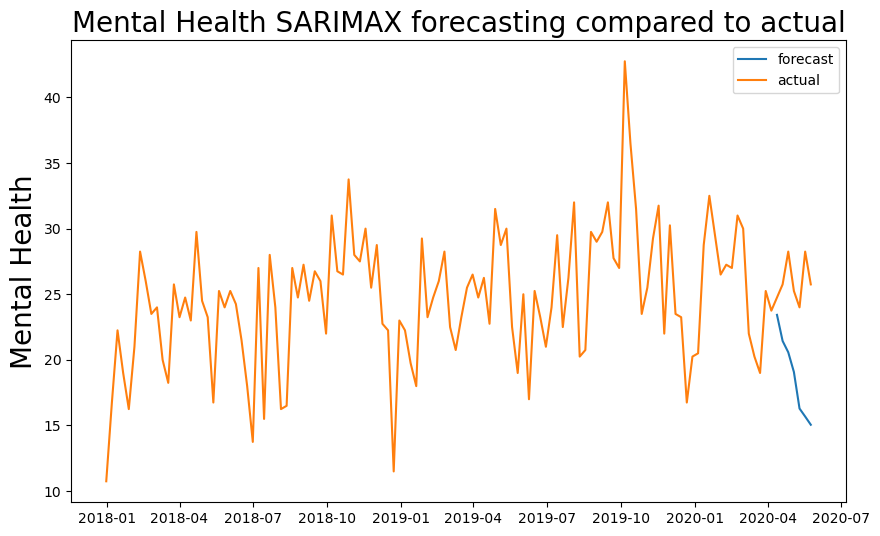

In [12]:
mse_dic_least = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='least_restricted', period='2020-05-30', steps=steps, search=search, plot=True)
    mse_dic_least[f'{search}_ex'] = mse
    plt.show()

### without Exogenous Features

In [13]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='least_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_least[search] = mse
    plt.show()


 Forecast for least_restricted and depression untill 2020-09-30 

MSE
68.26

 Forecast for least_restricted and anxiety untill 2020-09-30 

MSE
7.22

 Forecast for least_restricted and addiction untill 2020-09-30 

MSE
17.67

 Forecast for least_restricted and counselling untill 2020-09-30 

MSE
7.17

 Forecast for least_restricted and mental_health untill 2020-09-30 

MSE
24.99


In [14]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_least = functions.dict_diff(mse_dic_least)
print(sarima_diff_least)

{'depression': 24.62, 'anxiety': 7.68, 'addiction': -9.9, 'counselling': 47.27, 'mental_health': 39.14}


For least restricted states, adding covid restrictions as exogenous features decreased the performance of 'depression', 'anxiety', 'counselling' and 'mental health' forecasts. Adding exogenous features improved the performance of 'addiction' forecasting using SARIMAX.

---

# Plot the MSE differences for Most and Least restricted states with and without exogenous features

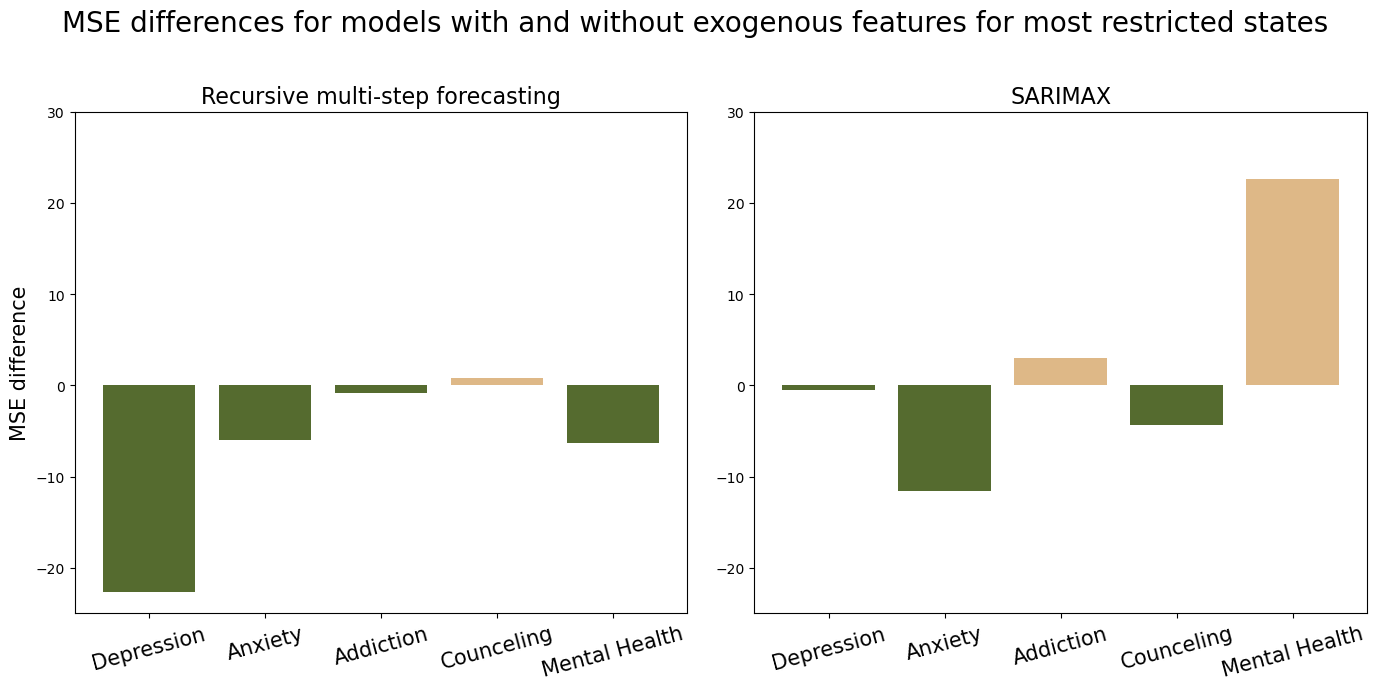

In [17]:
# Differences for most restricted states
functions.plot_MSE_difference(rf_diff_most, sarima_diff_most, 'most', period=period, ylim = [-25, 30])

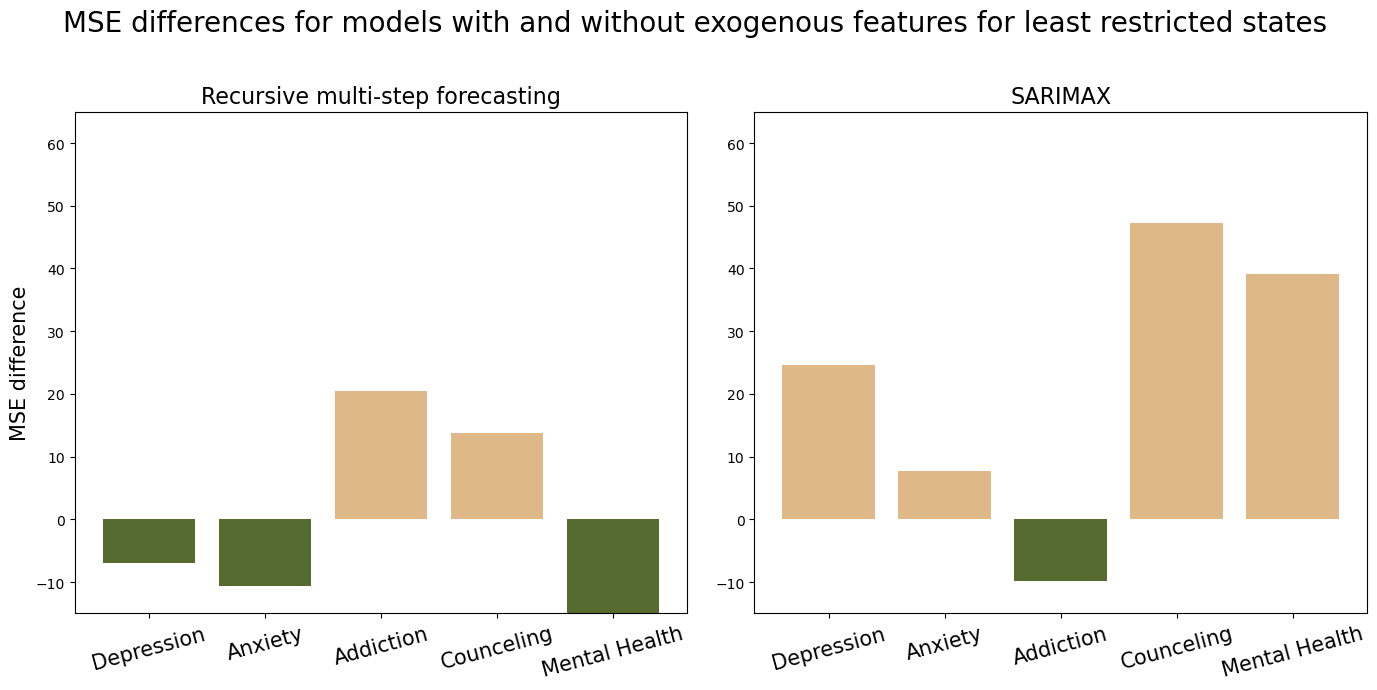

In [18]:
# Differences for Least restricted states
functions.plot_MSE_difference(rf_diff_least, sarima_diff_least, 'least', period=period, ylim = [-15, 65])

---

## Conclusion

During the COVID-19 pandemic, with restrictions in effect in many states, forecasting 'depression' and 'anxiety' searches for the most restricted states benefited from adding COVID Restrictions as exogenous features in both SARIMAX and recursive multi-step forecasting models. Least Restricted states with recursive multi-step forecasting did not benefit from adding exogenous features for both SARIMAX and recursive multi-step forecasting models in any of the search terms. However, adding restrictions as exogenous features improved the performance of forecasting 'depression', 'anxiety' and 'mental health' in recursive multi-step forecasting models, and the performance of forecasting 'addiction' searches using the SARIMAX model.